# Rice Classification Model using Hyper Parameters

### Register no: RA1811031010015
### Name: Shamik Basu
### Class: CSE-IT 'K1'

In [71]:
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

import seaborn as sns
from numpy import arange
from matplotlib import pyplot as plt
from scipy.stats import norm
import pandas as pd
from matplotlib import rcParams
from sklearn import tree

from sklearn.model_selection import KFold 
from sklearn.metrics import accuracy_score

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold


from sklearn.metrics import recall_score, precision_score, confusion_matrix

rcParams['figure.figsize'] = [18, 7]
rcParams['font.size'] = '18'
sns.set_style('darkgrid')

## Data Cleaning

In [72]:
file_name = '/home/shamik/Desktop/Shamik/SRM/ML_Sem_7/Assignment_5/riceClassification.csv'

df = pd.read_csv(file_name, header=0, index_col=0)

df.head()

,Area,MajorAxisLength,MinorAxisLength,Eccentricity,ConvexArea,EquivDiameter,Extent,Perimeter,Roundness,AspectRation,Class
id,,,,,,,,,,,
1,4537,92.229316,64.012769,0.719916,4677,76.004525,0.657536,273.085,0.764510,1.440796,1
2,2872,74.691881,51.400454,0.725553,3015,60.471018,0.713009,208.317,0.831658,1.453137,1
3,3048,76.293164,52.043491,0.731211,3132,62.296341,0.759153,210.012,0.868434,1.465950,1
4,3073,77.033628,51.928487,0.738639,3157,62.551300,0.783529,210.657,0.870203,1.483456,1
5,3693,85.124785,56.374021,0.749282,3802,68.571668,0.769375,230.332,0.874743,1.510000,1


In [73]:
df.dtypes

Area                 int64
MajorAxisLength    float64
MinorAxisLength    float64
Eccentricity       float64
ConvexArea           int64
EquivDiameter      float64
Extent             float64
Perimeter          float64
Roundness          float64
AspectRation       float64
Class                int64
dtype: object

In [74]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18185 entries, 1 to 18185
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Area             18185 non-null  int64  
 1   MajorAxisLength  18185 non-null  float64
 2   MinorAxisLength  18185 non-null  float64
 3   Eccentricity     18185 non-null  float64
 4   ConvexArea       18185 non-null  int64  
 5   EquivDiameter    18185 non-null  float64
 6   Extent           18185 non-null  float64
 7   Perimeter        18185 non-null  float64
 8   Roundness        18185 non-null  float64
 9   AspectRation     18185 non-null  float64
 10  Class            18185 non-null  int64  
dtypes: float64(8), int64(3)
memory usage: 1.7 MB


In [75]:
df.memory_usage()

Index              145480
Area               145480
MajorAxisLength    145480
MinorAxisLength    145480
Eccentricity       145480
ConvexArea         145480
EquivDiameter      145480
Extent             145480
Perimeter          145480
Roundness          145480
AspectRation       145480
Class              145480
dtype: int64

In [76]:
df.memory_usage().sum()

1745760

In [77]:
df.describe()

,Area,MajorAxisLength,MinorAxisLength,Eccentricity,ConvexArea,EquivDiameter,Extent,Perimeter,Roundness,AspectRation,Class
count,18185.000000,18185.000000,18185.000000,18185.000000,18185.000000,18185.000000,18185.000000,18185.000000,18185.000000,18185.000000,18185.000000
mean,7036.492989,151.680754,59.807851,0.915406,7225.817872,94.132952,0.616653,351.606949,0.707998,2.599081,0.549079
std,1467.197150,12.376402,10.061653,0.030575,1502.006571,9.906250,0.104389,29.500620,0.067310,0.434836,0.497599
min,2522.000000,74.133114,34.409894,0.676647,2579.000000,56.666658,0.383239,197.015000,0.174590,1.358128,0.000000
25%,5962.000000,145.675910,51.393151,0.891617,6125.000000,87.126656,0.538530,333.990000,0.650962,2.208527,0.000000
50%,6660.000000,153.883750,55.724288,0.923259,6843.000000,92.085696,0.601194,353.088000,0.701941,2.602966,1.000000
75%,8423.000000,160.056214,70.156593,0.941372,8645.000000,103.559146,0.695664,373.003000,0.769280,2.964101,1.000000
max,10210.000000,183.211434,82.550762,0.966774,11008.000000,114.016559,0.886573,508.511000,0.904748,3.911845,1.000000


In [78]:
df.mean()

Area               7036.492989
MajorAxisLength     151.680754
MinorAxisLength      59.807851
Eccentricity          0.915406
ConvexArea         7225.817872
EquivDiameter        94.132952
Extent                0.616653
Perimeter           351.606949
Roundness             0.707998
AspectRation          2.599081
Class                 0.549079
dtype: float64

In [79]:
df.var()

Area               2.152667e+06
MajorAxisLength    1.531753e+02
MinorAxisLength    1.012369e+02
Eccentricity       9.348387e-04
ConvexArea         2.256024e+06
EquivDiameter      9.813380e+01
Extent             1.089715e-02
Perimeter          8.702866e+02
Roundness          4.530658e-03
AspectRation       1.890828e-01
Class              2.476049e-01
dtype: float64

In [80]:
df.skew()

Area               0.195610
MajorAxisLength   -1.435530
MinorAxisLength    0.203100
Eccentricity      -1.109929
ConvexArea         0.202382
EquivDiameter     -0.003633
Extent             0.277237
Perimeter         -0.655861
Roundness         -0.180826
AspectRation       0.209454
Class             -0.197285
dtype: float64

In [81]:
df.kurtosis()

Area              -0.871518
MajorAxisLength    3.847142
MinorAxisLength   -1.406701
Eccentricity       3.773738
ConvexArea        -0.866180
EquivDiameter     -0.666110
Extent            -0.850224
Perimeter          1.348807
Roundness         -0.431585
AspectRation      -0.968104
Class             -1.961295
dtype: float64

In [82]:
df.min()

Area               2522.000000
MajorAxisLength      74.133114
MinorAxisLength      34.409894
Eccentricity          0.676647
ConvexArea         2579.000000
EquivDiameter        56.666658
Extent                0.383239
Perimeter           197.015000
Roundness             0.174590
AspectRation          1.358128
Class                 0.000000
dtype: float64

In [83]:
df.max()

Area               10210.000000
MajorAxisLength      183.211434
MinorAxisLength       82.550762
Eccentricity           0.966774
ConvexArea         11008.000000
EquivDiameter        114.016559
Extent                 0.886573
Perimeter            508.511000
Roundness              0.904748
AspectRation           3.911845
Class                  1.000000
dtype: float64

In [84]:
df.median()

Area               6660.000000
MajorAxisLength     153.883750
MinorAxisLength      55.724288
Eccentricity          0.923259
ConvexArea         6843.000000
EquivDiameter        92.085696
Extent                0.601194
Perimeter           353.088000
Roundness             0.701941
AspectRation          2.602966
Class                 1.000000
dtype: float64

In [85]:
df.corr()

,Area,MajorAxisLength,MinorAxisLength,Eccentricity,ConvexArea,EquivDiameter,Extent,Perimeter,Roundness,AspectRation,Class
Area,1.000000,0.599939,0.930215,-0.550073,0.999362,0.998158,0.230541,0.881540,0.620490,-0.623979,-0.816589
MajorAxisLength,0.599939,1.000000,0.273211,0.295717,0.602061,0.618002,-0.073549,0.870178,-0.202566,0.240471,-0.147741
MinorAxisLength,0.930215,0.273211,1.000000,-0.808640,0.928992,0.923790,0.308541,0.674249,0.834398,-0.860516,-0.917766
Eccentricity,-0.550073,0.295717,-0.808640,1.000000,-0.547896,-0.534688,-0.329954,-0.165915,-0.903657,0.950301,0.788636
ConvexArea,0.999362,0.602061,0.928992,-0.547896,1.000000,0.997403,0.227359,0.886987,0.610236,-0.621472,-0.814214
EquivDiameter,0.998158,0.618002,0.923790,-0.534688,0.997403,1.000000,0.225944,0.891567,0.607432,-0.609957,-0.809361
Extent,0.230541,-0.073549,0.308541,-0.329954,0.227359,0.225944,1.000000,0.073227,0.366793,-0.350875,-0.303440
Perimeter,0.881540,0.870178,0.674249,-0.165915,0.886987,0.891567,0.073227,1.000000,0.186063,-0.227256,-0.533274
Roundness,0.620490,-0.202566,0.834398,-0.903657,0.610236,0.607432,0.366793,0.186063,1.000000,-0.947875,-0.831759
AspectRation,-0.623979,0.240471,-0.860516,0.950301,-0.621472,-0.609957,-0.350875,-0.227256,-0.947875,1.000000,0.832563


## Data Exploration

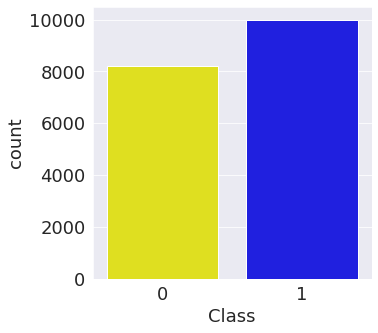

In [86]:
plt.figure(figsize=(5,5))
colors = ['yellow','blue']
sns.countplot(x='Class',data=df,palette=colors)
plt.show()

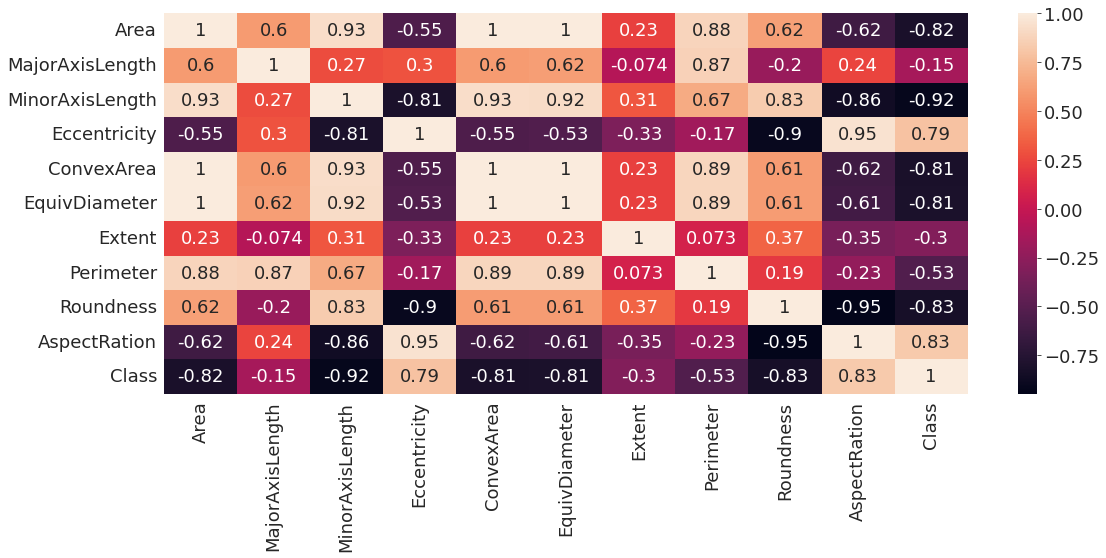

In [87]:
sns.heatmap(df.corr(), annot=True);

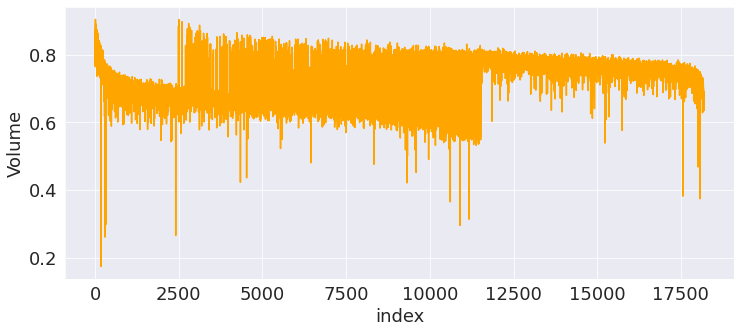

In [88]:
df['Roundness'].plot(figsize=(12, 5), color='orange') # color and figsize changed

plt.xlabel('index')
plt.ylabel('Volume');

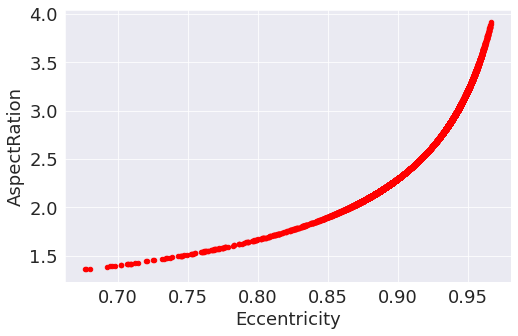

In [89]:
df.plot.scatter('Eccentricity', 'AspectRation', figsize=(8, 5),color='red');

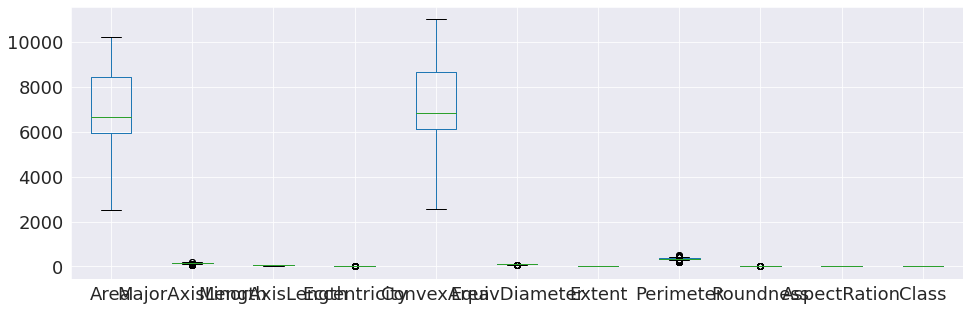

In [90]:
df.boxplot(figsize=(16, 5));

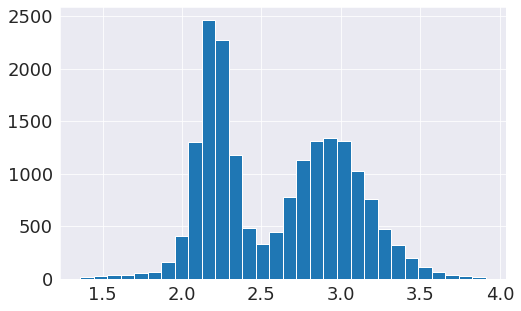

In [91]:
df['AspectRation'].hist(bins=30, figsize=(8, 5));

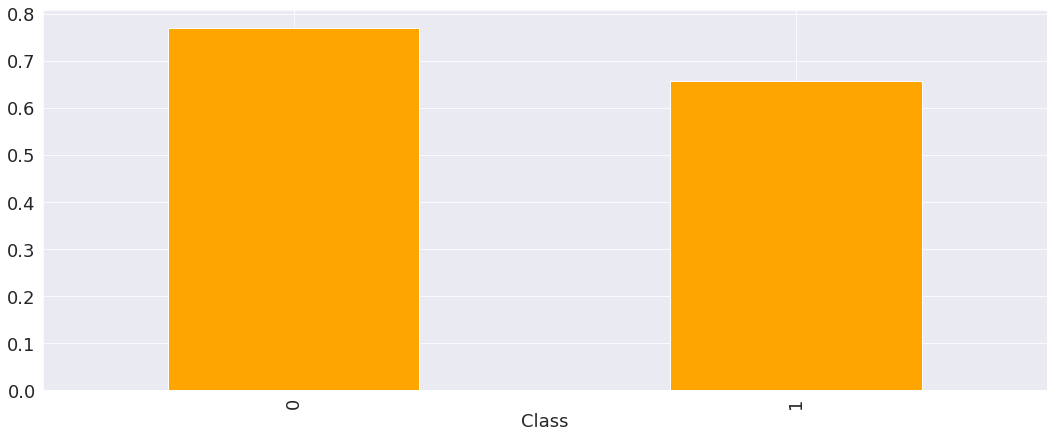

In [92]:
df_avg_placed = df.groupby('Class')['Roundness'].mean()
df_avg_placed.plot.bar(color='orange');

## Target Variable Selection

In [93]:
X = df.iloc[:,:-1]
y = df.iloc[:,-1]

## Data Split using K-Fold and Train Test Split

In [94]:
from sklearn.model_selection import train_test_split
#Splitting data into 1/3 for test and the rest for training
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)

In [95]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.linear_model import LogisticRegression

k = 5
kf = KFold(n_splits=k, random_state=None)
model = LogisticRegression(solver= 'liblinear')

result = cross_val_score(model , X, y, cv = kf)

print("Avg accuracy: {}".format(result.mean()))

Avg accuracy: 0.9187792136376135


## Model Selection

In [96]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [97]:
#Linear SVM Classifier

sv = SVC(kernel="linear", C=0.025)

sv.fit(X_train, y_train)
print("Train Score: ", sv.score(X_train, y_train)*100 , "%")
print("Test Score: ", sv.score(X_test, y_test)*100, "%")

Train Score:  98.95756381843552 %
Test Score:  98.73375541486172 %


In [98]:
#Random Forest Classifier 1 with hyper parameters

rf1 = RandomForestClassifier(max_depth=4,min_samples_leaf=2)

rf1.fit(X_train, y_train)
print("Train Score: ", rf1.score(X_train, y_train)*100 , "%")
print("Test Score: ", rf1.score(X_test, y_test)*100, "%")

Train Score:  99.07247804317491 %
Test Score:  98.8003998667111 %


In [99]:
#Random Forest Classifier 2 with hyper parameters

rf2 = RandomForestClassifier(max_depth=4, n_estimators=8, max_features=6)

rf2.fit(X_train, y_train)
print("Train Score: ", rf2.score(X_train, y_train)*100 , "%")
print("Test Score: ", rf2.score(X_test, y_test)*100, "%")

Train Score:  99.12172699663465 %
Test Score:  98.8003998667111 %


Train Score:  99.03964540753509 %
Test Score:  98.71709430189937 %


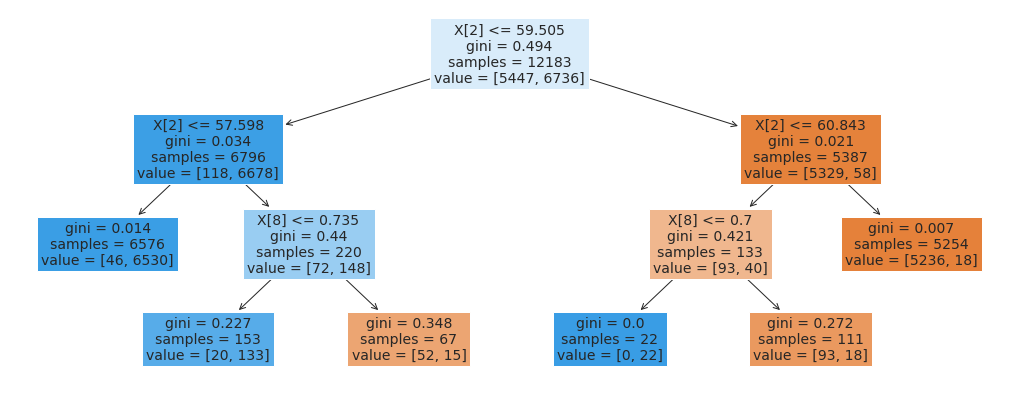

In [100]:
# Decision Tree Classifier 1 with Hyper Parameters

dt1 = DecisionTreeClassifier(max_leaf_nodes=6)

dt1.fit(X_train, y_train)
print("Train Score: ", dt1.score(X_train, y_train)*100 , "%")
print("Test Score: ", dt1.score(X_test, y_test)*100, "%")
tree.plot_tree(dt1, filled=True, fontsize=14);

Train Score:  99.03964540753509 %
Test Score:  98.71709430189937 %


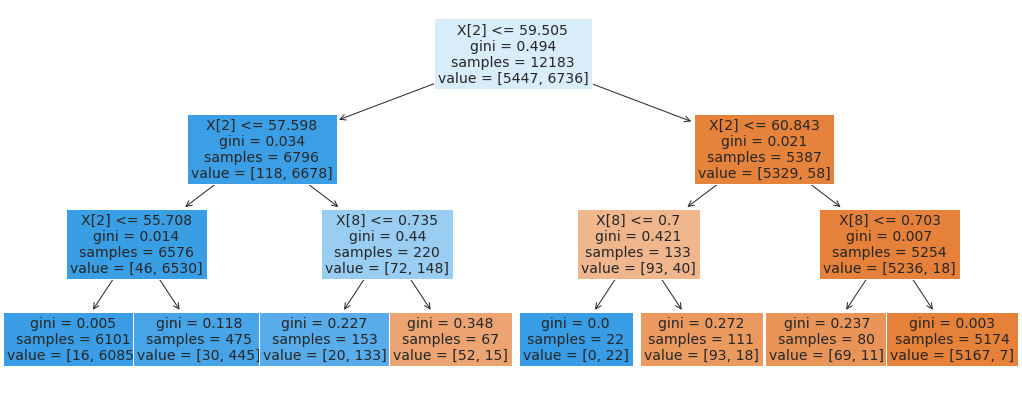

In [101]:
#Decision Tree Classifier 2 with Hyper Parameters

dt2 = DecisionTreeClassifier(max_depth=3,min_samples_leaf=3)

dt2.fit(X_train, y_train)
print("Train Score: ", dt2.score(X_train, y_train)*100 , "%")
print("Test Score: ", dt2.score(X_test, y_test)*100, "%")
tree.plot_tree(dt2, filled=True, fontsize=14);

## Model Evaluation

In [102]:
# Decision Tree is selected for better perfoemance and evaluation for the same is conducted.

y_pred = dt2.predict(X_test)

print("Recall score:", recall_score(y_test, y_pred, average='macro'))
print("Precision score:", precision_score(y_test, y_pred, average='macro'))
print ("Confusio Matrix:\n", confusion_matrix(y_test, y_pred))

Recall score: 0.9865143338971437
Precision score: 0.9877148505796595
Confusio Matrix:
 [[2694   59]
 [  18 3231]]


In [103]:
# Random Forest Classifier is selected for better perfoemance and evaluation for the same is conducted.

y_pred = rf2.predict(X_test)

print("Recall score:", recall_score(y_test, y_pred, average='macro'))
print("Precision score:", precision_score(y_test, y_pred, average='macro'))
print ("Confusio Matrix:\n", confusion_matrix(y_test, y_pred))

Recall score: 0.9873669810610927
Precision score: 0.9885380088908992
Confusio Matrix:
 [[2697   56]
 [  16 3233]]


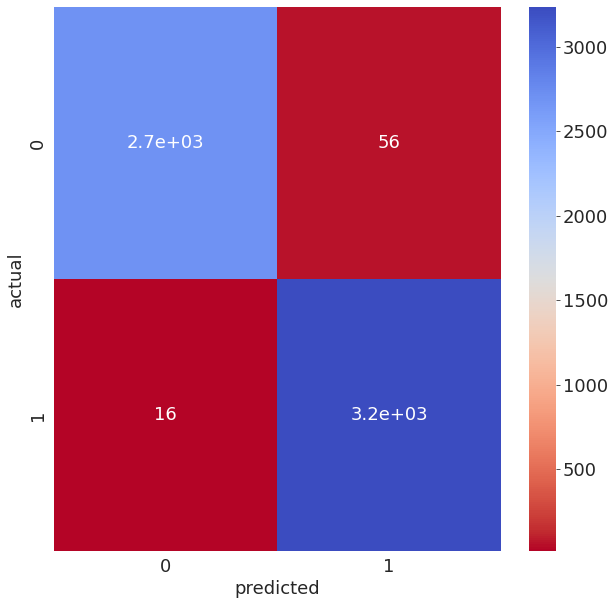

In [104]:
plt.figure(figsize=(10,10))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, cmap='coolwarm_r')
plt.xlabel('predicted')
plt.ylabel('actual');

# Model has been developed with 98% accuracy using Random Forest Classifier with Hyper Parameters